# 1) Spin correlations of the one-dimensional Heisenberg model

Consider the isotropic Heisenberg model in $d=1$ dimension with open boundary conditions
\begin{equation*}
    H = -J \sum\limits_{i=1}^{N-1} \vec S_i \cdot \vec S_{i+1},
\end{equation*}
with $J=-1$ (antiferromagnetic case).

\noindent The spin correlation between site $1$ and $n$ is
\begin{equation*}
    \chi_{1n} = \langle\vec S_1\cdot \vec S_n\rangle
\end{equation*}

In [1]:
include("hamilton_spins.jl");

## a)



In [2]:
J = -1
N = 10

Js = reset_Js(N)

# coupling between (i,i+1) for α=x (1)
for i in 1:(N-1)
    Js[1][i,i+1] = J
end

# coupling between (i,i+1) for α=y,z (2,3)
Js[2] = Js[1]
Js[3] = Js[1]

H = rationalize.(calculate_hamilton_matrix(Js, N));

In [3]:
# ground state
ψ_g = eigvecs(Matrix(H))[:,1]; # (no degeneracy for even N)
# eigen energy of the ground state (for even N)
E_g = eigvals(Matrix(H))[1]

-4.258035207282881

In [4]:
ψ_g′ = round.(ψ_g; digits=9 ); # eps() precision
# check
H * ψ_g′ ≈ E_g * ψ_g′

true

In [5]:
ψ_g′

1024-element Vector{Float64}:
  0.0
 -0.0
 -0.0
 -0.0
  0.0
 -0.0
  0.0
  0.0
 -0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
 -0.0
 -0.0
  0.0
  0.0
  0.0
  0.0
 -0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [6]:
# writing the ground state in the basis
spins = ["↓", "↑"]
for n in 0:2^N-1
    if iszero(ψ_g′[n+1])
        continue
    end
    n2 = n_dual(n)
    print("+ $(ψ_g′[n+1]) |")
    for i in n2
        print(spins[i+1])
    end
    println("⟩")
end

+ -9.52e-7 |↑↑↑↑↑↓↓↓↓↓⟩
+ 1.1434e-5 |↑↑↑↑↓↑↓↓↓↓⟩
+ -5.6787e-5 |↑↑↑↓↑↑↓↓↓↓⟩
+ 0.00014761 |↑↑↓↑↑↑↓↓↓↓⟩
+ -0.000202598 |↑↓↑↑↑↑↓↓↓↓⟩
+ 0.000101293 |↓↑↑↑↑↑↓↓↓↓⟩
+ -5.6787e-5 |↑↑↑↑↓↓↑↓↓↓⟩
+ 0.000409738 |↑↑↑↓↑↓↑↓↓↓⟩
+ -0.001219089 |↑↑↓↑↑↓↑↓↓↓⟩
+ 0.001780337 |↑↓↑↑↑↓↑↓↓↓⟩
+ -0.000913247 |↓↑↑↑↑↓↑↓↓↓⟩
+ -0.000732733 |↑↑↑↓↓↑↑↓↓↓⟩
+ 0.003464686 |↑↑↓↑↓↑↑↓↓↓⟩
+ -0.005845096 |↑↓↑↑↓↑↑↓↓↓⟩
+ 0.003158496 |↓↑↑↑↓↑↑↓↓↓⟩
+ -0.002773708 |↑↑↓↓↑↑↑↓↓↓⟩
+ 0.008235986 |↑↓↑↓↑↑↑↓↓↓⟩
+ -0.005082494 |↓↑↑↓↑↑↑↓↓↓⟩
+ -0.00316204 |↑↓↓↑↑↑↑↓↓↓⟩
+ 0.003542542 |↓↑↓↑↑↑↑↓↓↓⟩
+ -0.000806589 |↓↓↑↑↑↑↑↓↓↓⟩
+ 0.00014761 |↑↑↑↑↓↓↓↑↓↓⟩
+ -0.001219089 |↑↑↑↓↑↓↓↑↓↓⟩
+ 0.003969935 |↑↑↓↑↑↓↓↑↓↓⟩
+ -0.00609128 |↑↓↑↑↑↓↓↑↓↓⟩
+ 0.003193776 |↓↑↑↑↑↓↓↑↓↓⟩
+ 0.003464686 |↑↑↑↓↓↑↓↑↓↓⟩
+ -0.017202537 |↑↑↓↑↓↑↓↑↓↓⟩
+ 0.030215195 |↑↓↑↑↓↑↓↑↓↓⟩
+ -0.016636388 |↓↑↑↑↓↑↓↑↓↓⟩
+ 0.016080988 |↑↑↓↓↑↑↓↑↓↓⟩
+ -0.049156902 |↑↓↑↓↑↑↓↑↓↓⟩
+ 0.030887104 |↓↑↑↓↑↑↓↑↓↓⟩
+ 0.019892686 |↑↓↓↑↑↑↓↑↓↓⟩
+ -0.022888682 |↓↑↓↑↑↑↓↑↓↓⟩
+ 0.005342898 |↓↓↑↑↑↑↓↑↓↓⟩
+ -0.002773708 |↑↑↑↓↓↓↑↑

### Spin correlation
The spin correlation is
\begin{equation}
    \chi_{nm} = \langle \vec S_n \vec S_m\rangle = \langle \psi_g|\vec S_n \cdot \vec S_m|\psi_g\rangle = \langle \psi_g| H_{nm} |\psi_g\rangle
\end{equation}
with
\begin{equation}
    H_{nm} = \vec S_n \cdot \vec S_m
\end{equation}
which can be interpeted as a Hamiltonian coupling only $m$ and $n$ with $J=-1$.

In the case of $n = m$, it is
\begin{equation}
    \vec S_n^2 = (S_n^x)^2 + (S_n^y)^2 + (S_n^z)^2 = \frac{3}{4}\cdot\hat{\mathbf{1}}
\end{equation}

In [153]:
function spin_correlation(N,ψ, n,m; H_sc = false)
    if n == m
        # algorithm for hamiltonian not working for (n,n) coupling, manually:
        return 3/4 * ψ' * ψ # 1/4 for each α=x,y,z
    end
    if H_sc == false
        # calculate the Hamilton matrix for the coupling
        Js_sc = reset_Js(N)
        # only coupling between (n,m) for all α
        Js_sc[1][n,m] = -1
        Js_sc[2][n,m] = -1
        Js_sc[3][n,m] = -1
        H_sc = calculate_hamilton_matrix(Js_sc, N)
    end # else: H_sc is given, e.g.for multiple calculations for the same (n,m) for different states
    return (ψ' * H_sc * ψ)[1] # 1×1 matrix to scalar
end

spin_correlation (generic function with 1 method)

In [8]:
for n in 1:N
    println("χ(1,$n) = ", spin_correlation(N, ψ_g′, 1,n))
end

χ(1,1) = 0.7499999988291419
χ(1,2) = -0.6580945030372307
χ(1,3) = 0.19762199862366187
χ(1,4) = -0.2223994899839209
χ(1,5) = 0.10829899898297354
χ(1,6) = -0.13115007763871583
χ(1,7) = 0.0701300763885584
χ(1,8) = -0.09158894830675846
χ(1,9) = 0.0446887925542845
χ(1,10) = -0.06750684641199428


In [9]:
# vector in basis |n⟩
function e(i,N)
    tmp = zeros(Int,2^N)
    tmp[i+1] = 1
    return tmp
end

e (generic function with 1 method)

In [10]:
using Plots

In [160]:
plot(1:N, [spin_correlation(N, ψ_g′, 1, n) for n in 1:N ], label=false)
xlabel!("n")
ylabel!("\\chi_{1n}")
savefig("1a.png")

In [59]:
using ProgressMeter

## b) temperature dependence of the spin correlation
\begin{equation}
    \chi_{1n}(T) = \frac{1}{Z} \sum\limits_l \langle l|\vec S_1\cdot\vec S_n|l\rangle e^{-\beta E_l}
\end{equation}
with $Z = \sum_l e^{-\beta E_l}$ (partition function), $|l\rangle$ eigenstates and eigenenergies $E_l$.

In [21]:
β(T) = 1/T

# partition function
Z(T, Es) = sum([exp(-β(T) * E) for E in Es]) # Es: Array of Eigenenergies

Z (generic function with 1 method)

In [154]:
function spin_correlation_temperature(T, n, H, N; ls = false, Es = false)
    # eigenstates
    if ls == false
        ls = round.(eigvecs(Matrix(H)); digits=9)
    end
    # eigenenergies
    if Es == false
        Es = eigvals(Matrix(H))
    end
    
    # (from spin_correlation(...))
    if n == 1
        # manually:
        return 1/Z(T, Es) * sum([spin_correlation(N, ls[:,i], 1, 1) * exp(-β(T) * Es[i]) for i in 1:length(Es)])
    end
    # calculate the Hamilton matrix only one time
    Js_sc = reset_Js(N)
    # only coupling between (1,n) for all α
    Js_sc[1][1,n] = -1
    Js_sc[2][1,n] = -1
    Js_sc[3][1,n] = -1
    H_sc = calculate_hamilton_matrix(Js_sc, N)
    
    return 1/Z(T, Es) * sum([spin_correlation(N, ls[:,i], 1, n; H_sc = H_sc) * exp(-β(T) * Es[i]) for i in 1:length(Es)])
end

spin_correlation_temperature (generic function with 2 methods)

In [156]:
Ts = [0.5, 2, 10]
χₛ = zeros(length(Ts),10)

# (from spin_correlation_temperature(...))
# eigenstates
ls = round.(eigvecs(Matrix(H)); digits=9)
# eigenenergies
Es = eigvals(Matrix(H))

@time for i in 1:length(Ts)
    T = Ts[i]
    for n in 1:10
        χₛ[i,n] = spin_correlation_temperature(T, n, H, N; ls = ls, Es = Es)
    end
end
χₛ

  0.434696 seconds (2.19 M allocations: 805.503 MiB, 6.99% gc time)


3×10 Matrix{Float64}:
 0.75  -0.39752    0.124521    -0.0588122   …   0.00102806   -0.000546712
 0.75  -0.103424   0.0121258   -0.00155796      5.35124e-8   -6.92579e-9
 0.75  -0.0192061  0.00047575  -1.1987e-5      -3.68803e-12   1.78773e-12

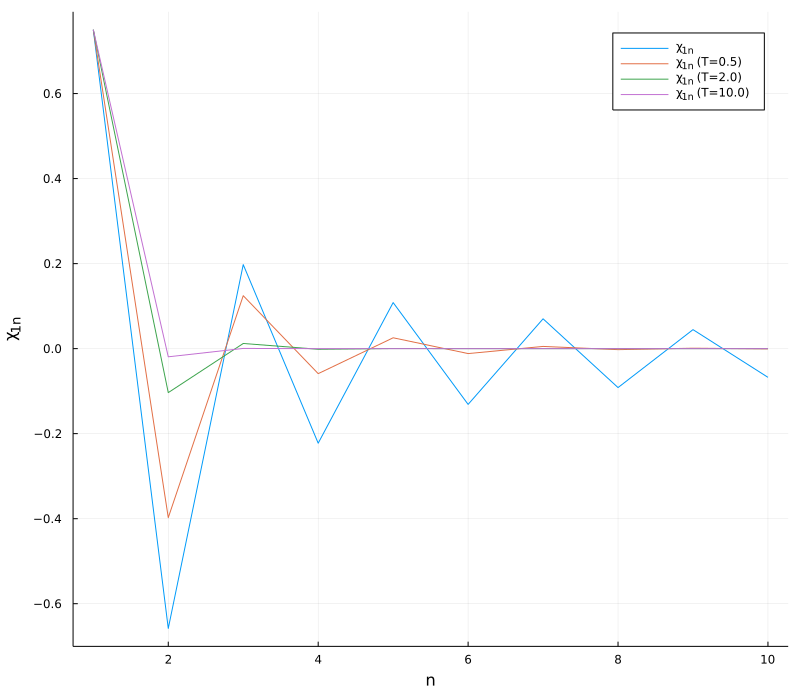

In [164]:
plot(1:N, [spin_correlation(N, ψ_g′, 1, n) for n in 1:N ], label="\\chi_{1n}", size=(800,700))
xlabel!("n")
ylabel!("\\chi_{1n}")
for i in 1:length(Ts)
    plot!(1:N, χₛ[i,:], label="\\chi_{1n} \\(T=$(Ts[i])\\)")
end
plot!()

In [165]:
savefig("1b.png")

## c) $\lim\limits_{T\to 0} \chi_{1n}(T) \stackrel{!}{=}\chi_{1n}$

In [181]:
Ts = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01]
χₛ = zeros(length(Ts),10)

# (from spin_correlation_temperature(...))
# eigenstates
ls = round.(eigvecs(Matrix(H)); digits=9)
# eigenenergies
Es = eigvals(Matrix(H))

@time for i in 1:length(Ts)
    T = Ts[i]
    for n in 1:10
        χₛ[i,n] = spin_correlation_temperature(T, n, H, N; ls = ls, Es = Es)
    end
end
χₛ

  1.541744 seconds (8.02 M allocations: 2.884 GiB, 7.21% gc time)


11×10 Matrix{Float64}:
 0.75  -0.39752   0.124521  -0.0588122  …  0.00102806  -0.000546712
 0.75  -0.42701   0.138403  -0.0708062     0.00173791  -0.00102081
 0.75  -0.458617  0.153046  -0.0851838     0.00294826  -0.00192817
 0.75  -0.491834  0.167782  -0.102084      0.00498016  -0.00365798
 0.75  -0.525773  0.181544  -0.121387      0.00828864  -0.00689903
 0.75  -0.559163  0.192872  -0.142618   …  0.0134097   -0.0127564
 0.75  -0.590608  0.200158  -0.165015      0.0207406   -0.0226969
 0.75  -0.619248  0.202308  -0.187872      0.0300353   -0.0378327
 0.75  -0.644202  0.200069  -0.209713      0.0394723   -0.0561745
 0.75  -0.657533  0.19773   -0.221882      0.0444812   -0.0670445
 0.75  -0.658095  0.197622  -0.222399   …  0.0446888   -0.0675068

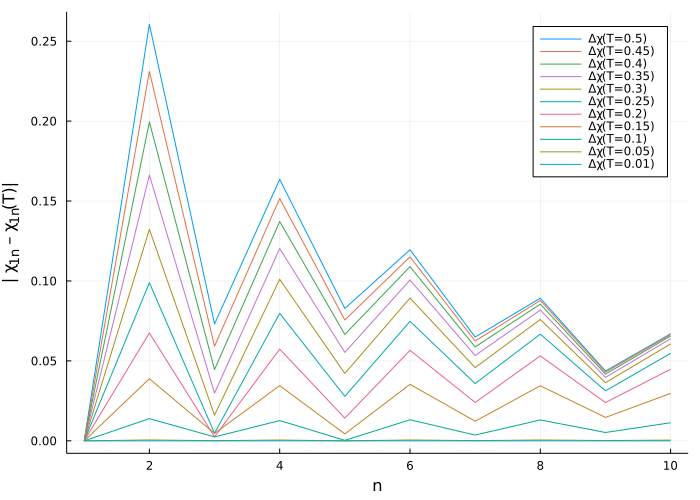

In [182]:
χₛ_zero = [spin_correlation(N, ψ_g′, 1, n) for n in 1:N]
plot(size=(700,500))
for i in 1:length(Ts)
    plot!(1:N, abs.(χₛ_zero .- χₛ[i,:]), label="\\Delta\\chi\\(T=$(Ts[i])\\)")
end
plot!()
xlabel!("n")
ylabel!("| \\chi_{1n} – \\chi_{1n}\\(T\\)|")

In [177]:
savefig("1c.png")

In [188]:
Δtotal = []
for i in 1:length(Ts)
    push!(Δtotal, sum((χₛ_zero .- χₛ[i,:]).^2))
    println(Ts[i], ": ", last(Δtotal))
end

0.5: 0.1397138005500855
0.45: 0.11673571432052875
0.4: 0.09372030351408296
0.35: 0.07138182116484455
0.3: 0.05058358770542054
0.25: 0.03224806969444164
0.2: 0.017243608875522527
0.15: 0.006421624808722178
0.1: 0.0008726596236368416
0.05: 1.443380022400355e-6
0.01: 2.588565401053108e-29


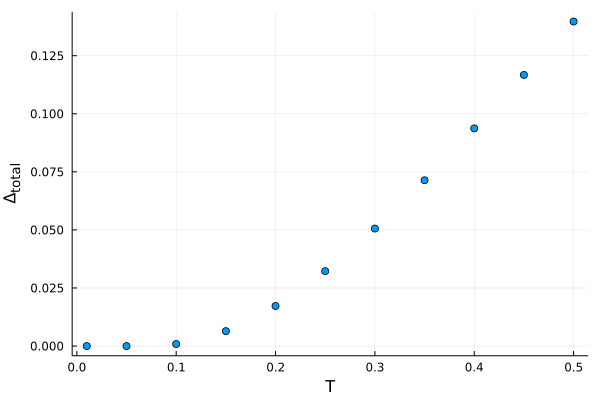

In [195]:
plot(Ts, Δtotal, label=false, lines=false, markers=true)
xlabel!("T")
ylabel!("\\Delta_{total}")

In [196]:
savefig("1c-2.png")